# Weather Analysis at Equator using APIs
----
### Objective:
To Validate using weather data from Openweathermapy API that cities closer to equator are hotter by building a series of scatter plots. Also to explore the relationships between Latitude and Temprature, Humidity, Cloudiness and Wind Speed. City locations are based on latitude and longitude and are randomly generated. 


### Analysis
* As expected, based on the review of the scatter plots, its evident that the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---



### Analysis Results -> 


1. Latitude and Temparatures are correlated. The closer the city is to the equator the warmer it is and viceversa. 
2. There is no correlation between Latitude and Humidity as the plot shows high humidity across all latitudes.
3. There is no correlation between Latitide and Wind Speed as the wind speed varies across all latitudes.

In [87]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime

# Import API key

# get key from https://openweathermap.org/api
# from api_keys import api_key 
# or
# api_key ='place key here'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

current_time = datetime.now()
current_date = current_time.strftime('%m/%d/%Y')


## Generate Cities List

In [88]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

city_df = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


521

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [89]:
i = 1 
set = 1

settings = {"units": "imperial", "appid": api_key}

print("Beginning Data Retrieval")     
print("-----------------------------")
    
for city in cities:
    
    try:
        data = owm.get_current(city, **settings)     
        
        
        city_df.append({         'City' :  data['name'],
        'Cloudiness' : data['clouds']['all'],
        'Country' : data['sys']['country'],
        'Date' : data['dt'],
        'Humidity' : data['main']['humidity'],
        'Lat' : data['coord']['lat'],
        'Lng' : data['coord']['lon'],
        'Max_Temp' : data['main']['temp_max'],
        'Wind_Speed' : data['wind'] ['speed']
                        })
        print(f"Processing Record {i} of Set {set} | {city}")
        
    except:
        print("City not found. Skipping...")   
        i = 0
        set = set + 1

    i = i + 1

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pevek
City not found. Skipping...
Processing Record 1 of Set 2 | mahebourg
City not found. Skipping...
Processing Record 1 of Set 3 | vao
Processing Record 2 of Set 3 | arraial do cabo
Processing Record 3 of Set 3 | vaini
Processing Record 4 of Set 3 | flin flon
Processing Record 5 of Set 3 | saskylakh
Processing Record 6 of Set 3 | lake havasu city
Processing Record 7 of Set 3 | punta arenas
Processing Record 8 of Set 3 | butaritari
Processing Record 9 of Set 3 | heihe
Processing Record 10 of Set 3 | rawson
Processing Record 11 of Set 3 | ushuaia
Processing Record 12 of Set 3 | plerin
Processing Record 13 of Set 3 | east london
Processing Record 14 of Set 3 | hermanus
Processing Record 15 of Set 3 | mataura
Processing Record 16 of Set 3 | tuktoyaktuk
Processing Record 17 of Set 3 | hobart
Processing Record 18 of Set 3 | abu dhabi
City not found. Skipping...
Processing Record 1 of Set 4 | port alfred


Processing Record 85 of Set 17 | manokwari
Processing Record 86 of Set 17 | makakilo city
Processing Record 87 of Set 17 | xiongyue
Processing Record 88 of Set 17 | gobabis
Processing Record 89 of Set 17 | geraldton
Processing Record 90 of Set 17 | basna
Processing Record 91 of Set 17 | kodiak
Processing Record 92 of Set 17 | souillac
Processing Record 93 of Set 17 | pakxan
Processing Record 94 of Set 17 | powassan
Processing Record 95 of Set 17 | gubkinskiy
Processing Record 96 of Set 17 | saldanha
Processing Record 97 of Set 17 | nanortalik
City not found. Skipping...
Processing Record 1 of Set 18 | lamar
Processing Record 2 of Set 18 | lorengau
Processing Record 3 of Set 18 | ciudad bolivar
Processing Record 4 of Set 18 | warmbad
Processing Record 5 of Set 18 | georgetown
Processing Record 6 of Set 18 | thompson
Processing Record 7 of Set 18 | hambantota
Processing Record 8 of Set 18 | bajil
Processing Record 9 of Set 18 | mugumu
Processing Record 10 of Set 18 | gat
City not found. 

Processing Record 32 of Set 38 | valreas
Processing Record 33 of Set 38 | naze
Processing Record 34 of Set 38 | aswan
Processing Record 35 of Set 38 | moranbah
Processing Record 36 of Set 38 | sovetskiy
Processing Record 37 of Set 38 | coquimbo
City not found. Skipping...
Processing Record 1 of Set 39 | teguise
Processing Record 2 of Set 39 | dali
Processing Record 3 of Set 39 | dzitbalche
Processing Record 4 of Set 39 | albemarle
Processing Record 5 of Set 39 | mgandu
Processing Record 6 of Set 39 | hasaki
Processing Record 7 of Set 39 | tchollire
Processing Record 8 of Set 39 | hami
Processing Record 9 of Set 39 | zhangye
Processing Record 10 of Set 39 | volovo
Processing Record 11 of Set 39 | muhos
Processing Record 12 of Set 39 | sao filipe
Processing Record 13 of Set 39 | christchurch
Processing Record 14 of Set 39 | arequipa
Processing Record 15 of Set 39 | irituia
Processing Record 16 of Set 39 | uige
Processing Record 17 of Set 39 | kamennogorsk
Processing Record 18 of Set 39 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [78]:
weather_data = pd.DataFrame(city_df)  
weather_data.count()

City          477
Cloudiness    477
Country       477
Date          477
Humidity      477
Lat           477
Lng           477
Max_Temp      477
Wind_Speed    477
dtype: int64

In [90]:
weather_data.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Max_Temp', 'Wind_Speed'],
      dtype='object')

In [91]:
# create a csv file with city weather
weather_data.to_csv(output_data_file)

In [81]:
weather_data.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Iqaluit,75,CA,1569263240,75,63.75,-68.52,41.00,11.41
1,Cidreira,11,BR,1569263234,54,-30.17,-50.22,63.65,14.34
2,New Norfolk,40,AU,1569262959,90,-42.78,147.06,48.20,12.75
3,Deputatskiy,92,RU,1569263250,98,69.30,139.90,27.29,2.21
4,Aklavik,90,CA,1569263639,93,68.22,-135.01,39.20,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

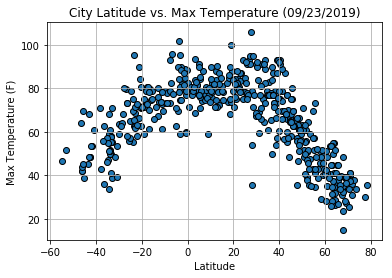

In [92]:
plt.scatter(weather_data.Lat,weather_data.Max_Temp,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.grid(True)
#plt.fig.canvas.draw_idle()
plt.savefig('output_data/lat_temp_plot.png')
plt.show()

#### Latitude vs. Humidity Plot

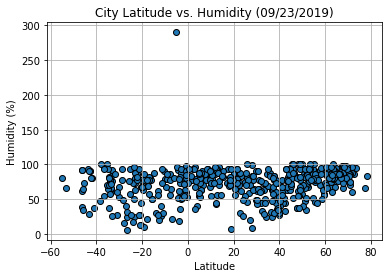

In [93]:
plt.scatter(weather_data.Lat,weather_data.Humidity,marker='o', edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid()
plt.savefig('output_data/Humidity_plot.png')
plt.show()

#### Latitude vs. Cloudiness Plot

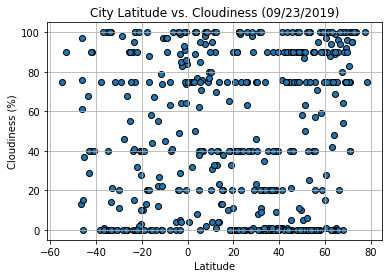

In [94]:
plt.scatter(weather_data.Lat,weather_data.Cloudiness,marker='o', edgecolors='black')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid()
plt.savefig('output_data/Cloudiness_plot.png')
plt.show()

#### Latitude vs. Wind Speed Plot

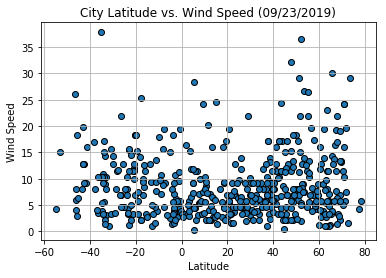

In [95]:
plt.scatter(weather_data.Lat,weather_data.Wind_Speed,marker='o', edgecolors='black')

#plt.scatter(City_Lat, City_Wind_Speed,marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid()
plt.savefig('output_data/Wind_Speed_plot.png')
plt.show()

In [96]:
# Save the data to cities.csv
weather_data.to_csv(output_data_file)